In [1]:
# שלב 1: טעינת ספריות
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.preprocessing import MinMaxScaler

# שלב 2: הגדרת הנתיב לקובץ
file_path = "C:/project_2year/wdbc.data"

# שלב 3: הגדרת שמות העמודות
columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# שלב 4: קריאת הקובץ
df = pd.read_csv(file_path, header=None, names=columns)
print(" Data loaded from:", file_path)

# שלב 5: שמירה לקובץ CSV נקי
clean_csv_path = "C:/project_2year/breast_cancer.csv"
df.to_csv(clean_csv_path, index=False)
print(" Clean CSV saved to:", clean_csv_path)

# שלב 6: תצוגה מקדימה של הנתונים
print("\n Preview of the dataset:")
df.info()



 Data loaded from: C:/project_2year/wdbc.data
 Clean CSV saved to: C:/project_2year/breast_cancer.csv

 Preview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius

cleaning data-we remove id column and checking missing values. 

In [2]:
data = df.drop([df.columns[0], df.columns[1]], axis=1)

In [3]:
data.isnull().sum()



radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
data = data.drop_duplicates()


At this stage, we aim to focus on a subset of key features that have the strongest influence on the diagnosis.


We generated three comparison plots between malignant and benign tumors:

1. Based on mean feature values.

2. Based on standard error (SE) feature values.

3. Based on worst-case (maximum) feature values.

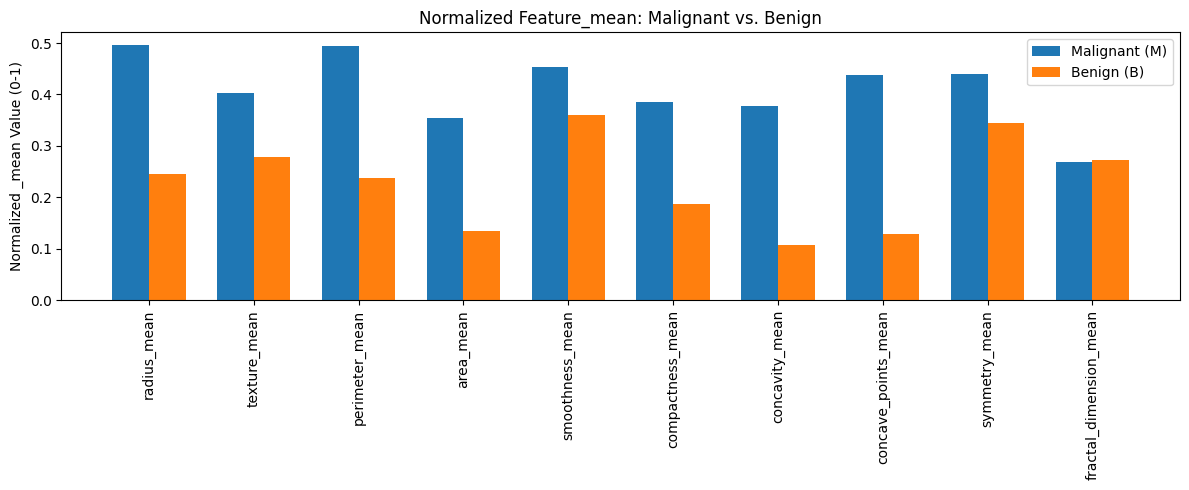

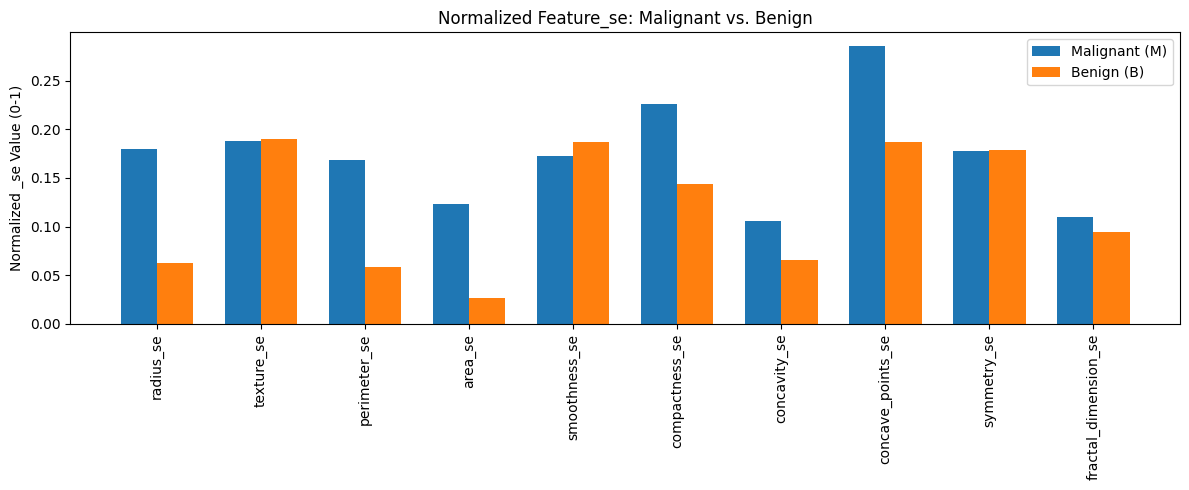

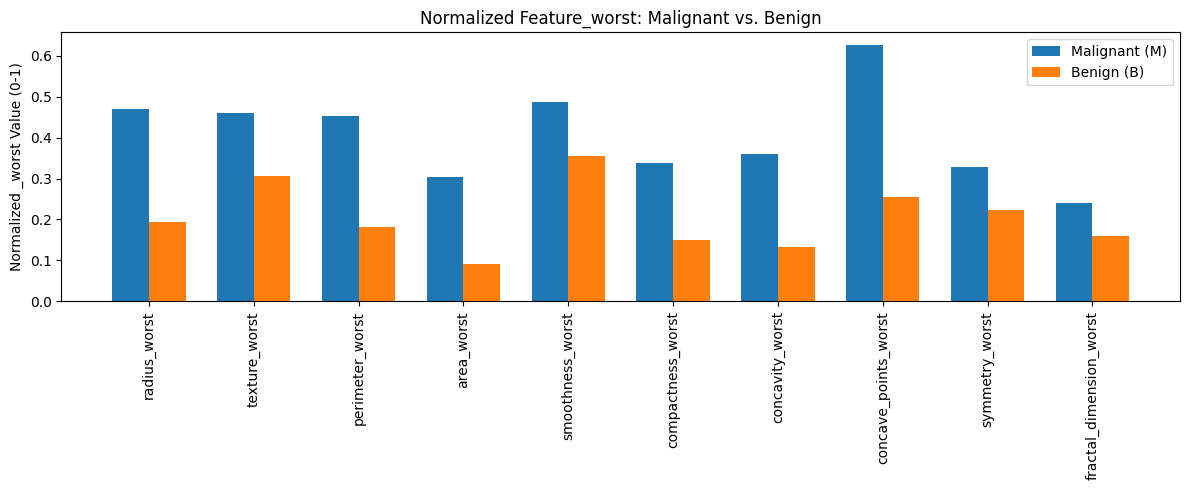

In [39]:

# pick_mean_columns: return list of df columns ending with '_mean'
def pick_mean_columns(df,suffix):
    mean_cols = []
    for col in df.columns:
        if col.endswith(suffix):
            mean_cols.append(col)
    return mean_cols

# scale_features: min–max scale specified columns to [0, 1]
def scale_features(df, columns):
    scaler = MinMaxScaler()
    df_copy = df.copy()
    df_copy[columns] = scaler.fit_transform(df_copy[columns].values)
    return df_copy

# compute_class_means: compute mean of each column for M and B
def compute_class_means(df, columns):
    malignant_means = df[df['Diagnosis'] == 'M'][columns].mean()
    benign_means    = df[df['Diagnosis'] == 'B'][columns].mean()
    return pd.DataFrame({
        'Malignant (M)': malignant_means,
        'Benign (B)'   : benign_means
    })

# plot_means: side-by-side bar chart for malignant vs benign
def plot_means(class_means, columns,suffix):
    x     = np.arange(len(columns))
    width = 0.35

    plt.figure(figsize=(12, 5))
    plt.bar(x,               class_means['Malignant (M)'], width=width, label='Malignant (M)')
    plt.bar(x + width,       class_means['Benign (B)'],    width=width, label='Benign (B)')

    plt.xticks(x + width/2, columns, rotation=90)
    plt.ylabel('Normalized '+suffix+' Value (0-1)')
    plt.title('Normalized Feature' +suffix+': Malignant vs. Benign')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ————————————————————————————————————————————
# Main workflow
# 1) Select '_mean' features
mean_cols = pick_mean_columns(df,'_mean')

# 2) Scale those features to [0, 1]
df_scaled = scale_features(df, mean_cols)

# 3) Compute class means
class_means = compute_class_means(df_scaled, mean_cols)

# 4) Plot the comparison
plot_means(class_means, mean_cols,'_mean')

se_cols = pick_mean_columns(df,'_se')

# 2) Scale those features to [0, 1]
df_scaled = scale_features(df, se_cols)

# 3) Compute class means
class_means = compute_class_means(df_scaled, se_cols)

# 4) Plot the comparison
plot_means(class_means, se_cols,'_se')

worst_cols = pick_mean_columns(df,'_worst')

# 2) Scale those features to [0, 1]
df_scaled = scale_features(df, worst_cols)

# 3) Compute class means
class_means = compute_class_means(df_scaled, worst_cols)

# 4) Plot the comparison
plot_means(class_means, worst_cols,'_worst')


We chose to focus primarily on the third plot, which illustrates the distribution of worst-case feature values between malignant and benign groups.
This decision is based on the clinical insight that cancer typically manifests in extreme and abnormal regions of the tissue rather than in its average structure.
Therefore, this plot is expected to provide more reliable and meaningful information, helping us identify a set of key features to focus on in the next steps of the analysis.
In addition to focusing on the worst-case feature values, we incorporated insights from the other two plots—based on the mean and standard error values—to reinforce and validate our conclusions.

Conclusion:
After completing our tri-layer EDA (mean, SE, worst), we decided to drop the four feature families that showed the weakest discriminatory power—Texture, Smoothness, Symmetry, and Fractal Dimension.

These variables displayed only marginal differences between malignant and benign samples across all three views, exhibited low variance, and in some cases were highly correlated with stronger predictors. Removing them reduces noise and redundancy, allowing the clustering algorithm to focus on the features that carry the most clinically meaningful signal.

Going forward, our analysis will concentrate on the six most informative feature families—Radius, Perimeter, Area, Concavity, Concave Points, and Compactness—as these consistently showed the clearest separation between malignant and benign tumors and provide the strongest signal for downstream clustering and interpretation.


Now we create violin plots

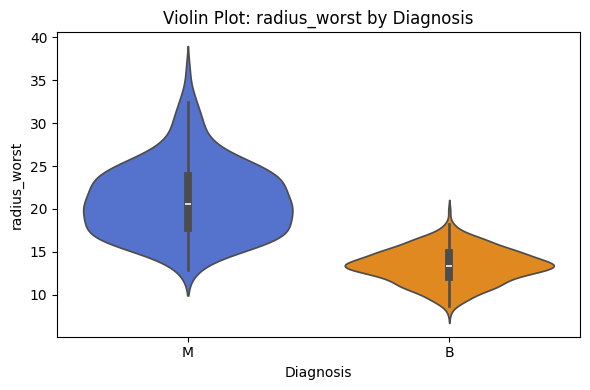

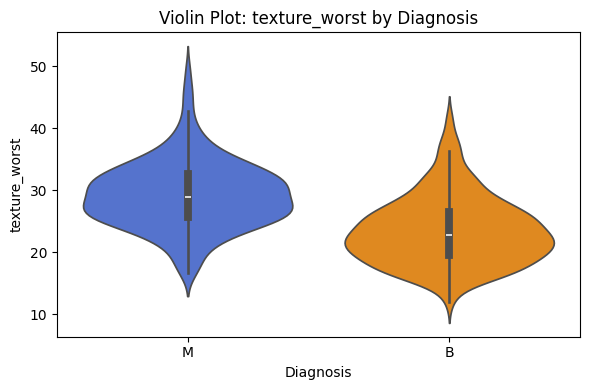

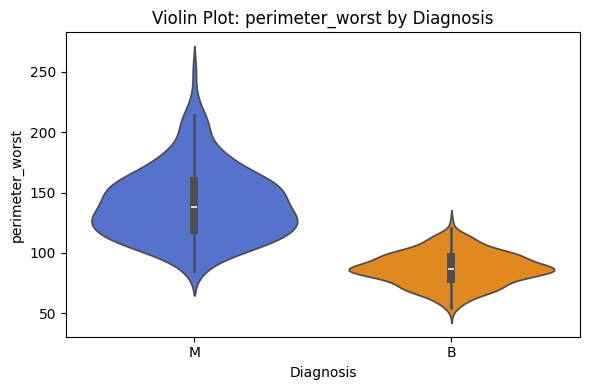

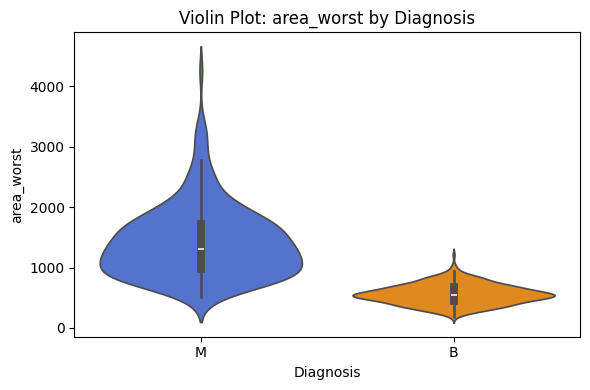

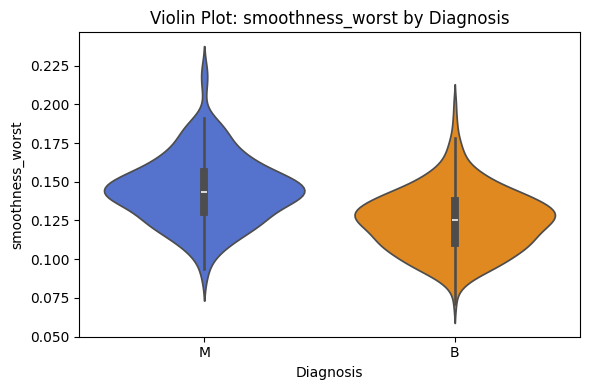

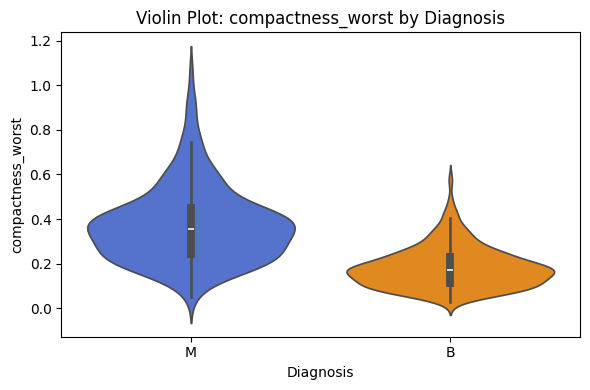

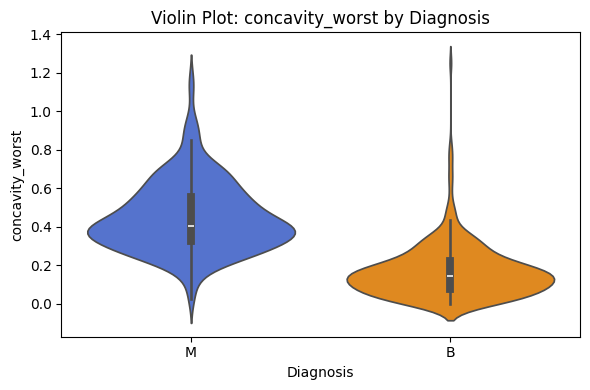

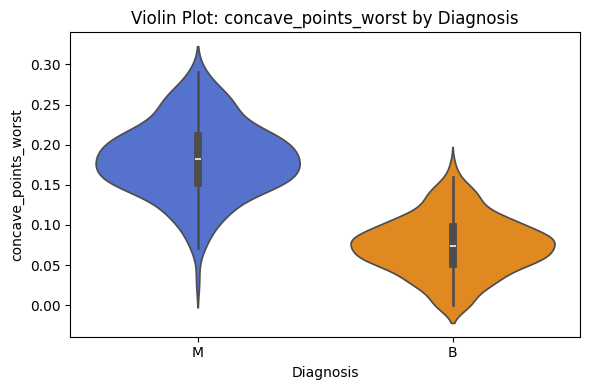

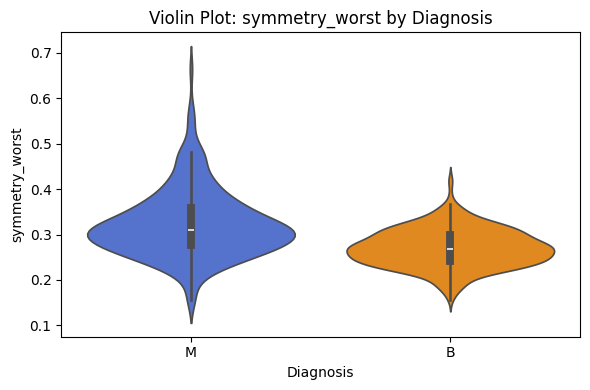

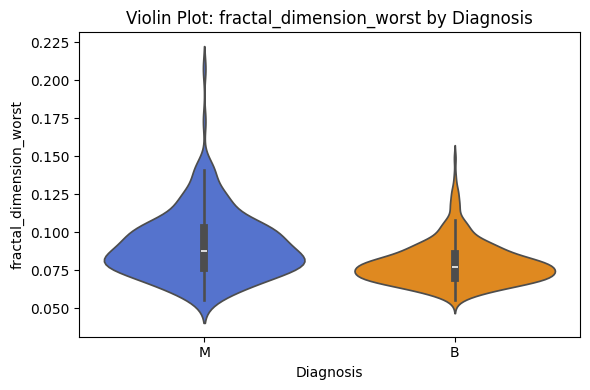

In [ ]:



custom_palette = {'M': 'royalblue', 'B': 'darkorange'}

for feature in worst_cols:
    plt.figure(figsize=(6, 4))
    
    sns.violinplot(
        x='Diagnosis',
        y=feature,
        hue='Diagnosis',        
        data=df,
        palette=custom_palette,    
        dodge=False,               
        legend=False              
    )
    
    plt.title(f"Violin Plot: {feature} by Diagnosis")
    plt.tight_layout()
    plt.show()



To evaluate which features are ineffective in distinguishing between malignant and benign tumors, we used Violin Plots.
These plots visualize not only the median and spread of each feature within both classes, but also the full distribution of values.
Features that exhibit high overlap in shape and center between the two classes—such as fractal_dimension_mean or symmetry_mean—are considered statistically weak discriminators and were therefore excluded from further analysis. 

In [ ]:
data_MB = df.drop(df.columns[0],axis=1)
def split_normalize_select_worst(data,suffix):
    """
    Splits data into sick and healthy groups, normalizes them,
    and returns only the '_worst' columns from the healthy group.
    """
    data_MB.columns = data_MB.columns.str.strip()

    
    sick = data_MB[data_MB['Diagnosis'] == 'M'].drop(columns=['Diagnosis'])
    healthy = data_MB[data_MB['Diagnosis'] == 'B'].drop(columns=['Diagnosis'])

    scaler = MinMaxScaler()
    sick_scaled = pd.DataFrame(scaler.fit_transform(sick), columns=sick.columns, index=sick.index)
    healthy_scaled = pd.DataFrame(scaler.fit_transform(healthy), columns=healthy.columns, index=healthy.index)

    worst_columns = [col for col in healthy_scaled.columns if col.endswith(suffix)]
    healthy_worst_only = healthy_scaled[worst_columns]

    return sick_scaled, healthy_worst_only



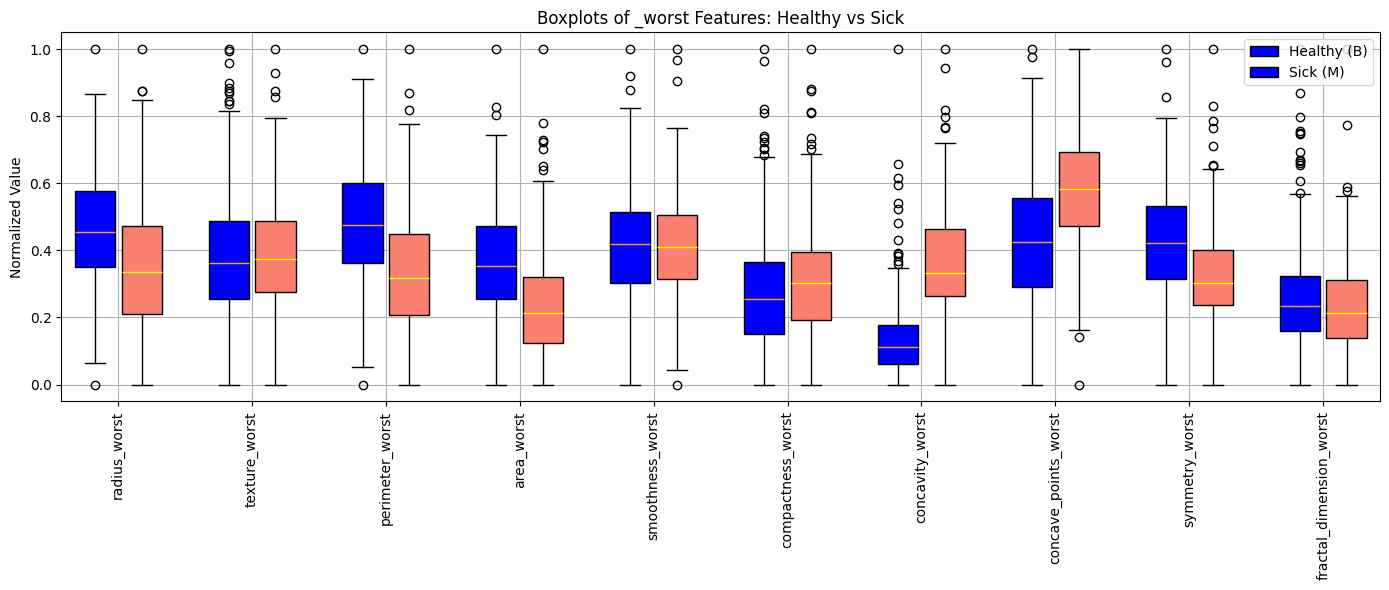

In [ ]:
sick,healthy =split_normalize_select_worst(data,'_worst')
columns = healthy.columns
n = len(columns)

positions_healthy = np.arange(n) * 2.0
positions_sick = positions_healthy + 0.7  

plt.figure(figsize=(14, 6))

plt.boxplot(
    [healthy[col] for col in columns],
    positions=positions_healthy,
    patch_artist=True,
    boxprops=dict(facecolor='blue'),
    medianprops=dict(color='orange'),  
    widths=0.6,
    tick_labels=['' for _ in columns]
)

plt.boxplot(
    [sick[col] for col in columns],
    positions=positions_sick,
    patch_artist=True,
    boxprops=dict(facecolor='salmon'),
    medianprops=dict(color='yellow'),  
    widths=0.6,
    tick_labels=['' for _ in columns]
)

xticks_positions = (positions_healthy + positions_sick) / 2
plt.xticks(xticks_positions, columns, rotation=90)

plt.title('Boxplots of _worst Features: Healthy vs Sick')
plt.ylabel('Normalized Value')
plt.legend(['Healthy (B)', 'Sick (M)'], loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

להוסיף הסבר של איילת- בגדול ניתוח של סטיית התקן על בסיס חציון ולא ממוצע, כך נמנעים מהשפעה של ערכים חריגים במיוחד על הגרף. 

כעת נשארנו עם 6 ערכים של ה WORST. ניצור טבלת חום עבור 6 תכונות אלה כדי לראות את הקשרים בינהם ובמידת הצורך נוכל להוריד תכונות שיש בינהם קורלציה גבוהה. 

In [ ]:

# Step 1: Select the 6 relevant worst-case features
selected_worst_features = [
    'radius_worst',
    'perimeter_worst',
    'area_worst',
    'concavity_worst',
    'concave points_worst',
    'compactness_worst'
]

# Step 2: Create correlation matrix
correlation_matrix = df[selected_worst_features].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show correlation values
    cmap="RdBu",         # Red-blue colormap
    center=0,            # Center the colormap at 0
    vmin=-1, vmax=1,     # Full correlation range
    linewidths=0.5,      # Grid lines between cells
    linecolor='gray'
)
plt.title("Correlation Heatmap of Worst-Case Features", fontsize=14)
plt.tight_layout()
plt.show()

